# Cluster Analysis

Cluster Analysis tries to distribute the data in groups (Clusters).

In [51]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython import display

## k-Means-Clustering

... tries to find the centers of Clusters which represent certain regions of the data.

1. Step: Distribute every data point to the nearest cluster.
2. Step: Update each Cluster-center as the mean of the data points in the corresponding cluster.

The Algo is finished if Cluster do not change.

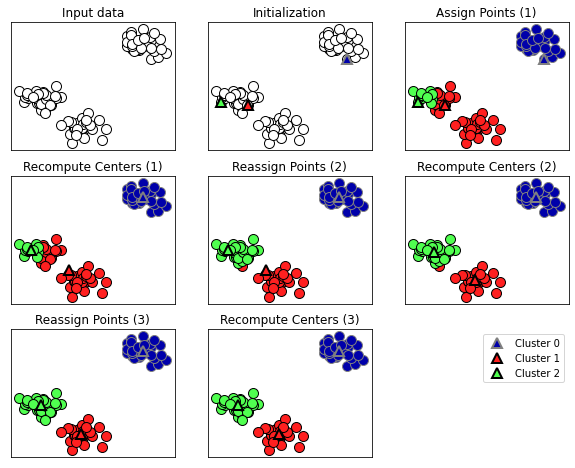

In [52]:
mglearn.plots.plot_kmeans_algorithm()

In [53]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state = 1)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [56]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [57]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [58]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

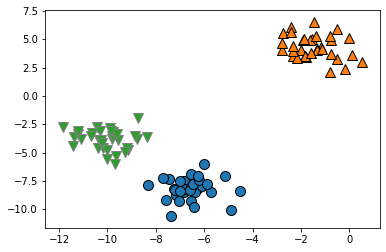

In [59]:
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_)

K-Means is only able to detect simple forms und assums that all Cluster have the same diameter. Therefore we have problems if one cluster is cloudy and an other is not widely spread.

Since each data point is represented by one centered Cluster point. We can look at it like PCA & NMF with one component. 

## Agglomerative Clustering

Every single point is an own Cluster und rejoins successively the nearest Cluster until we have the desired number of clusters. There are different similarity measure for the joining step:

1. ward: Variance has smallest possible increase in all Clusters. -> equally big Clusters
2. average: smallest average distance of points of two Clusters
3. complete: smallest maximal distance of two points of two Clusters

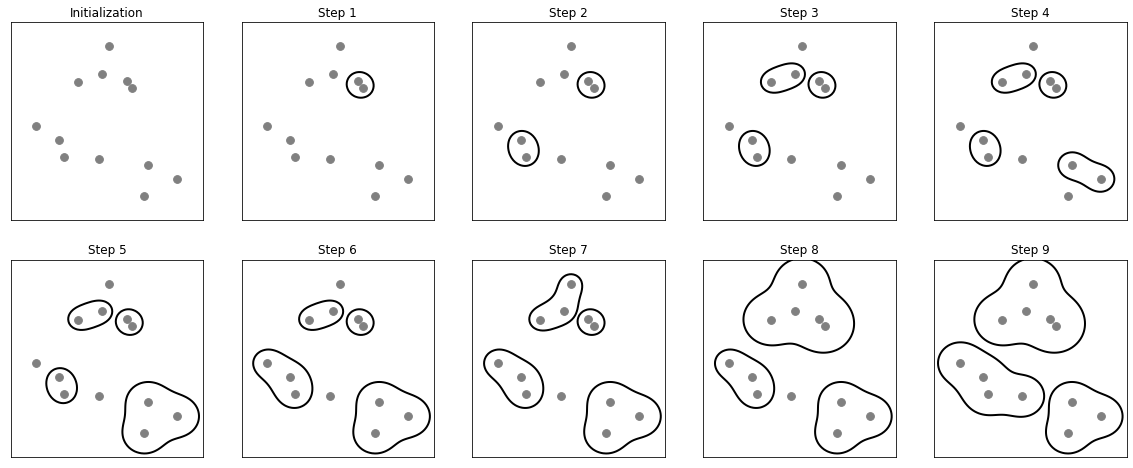

In [60]:
mglearn.plots.plot_agglomerative_algorithm()

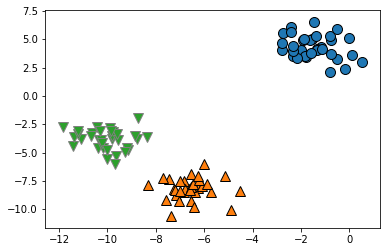

In [61]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state = 1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)

## DBSCAN

... identifies points in dense regions. We have two parameters min_samples and eps. If at least min_samples data points are in a radius of eps from a point x then is x a core point. Core points which are nearer than eps are a cluster. If a point has less than min_samples points in eps, the point is in no Cluster, it is noise.

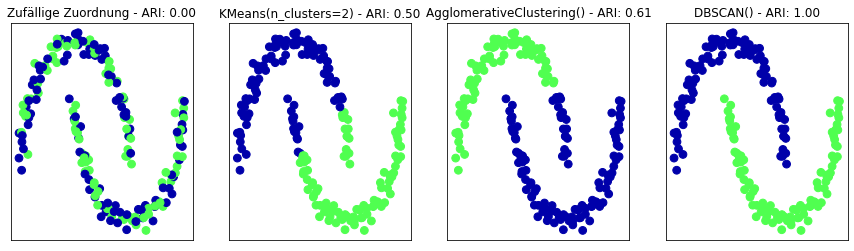

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples = 200, noise = 0.05,random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4,figsize = (15,4),
                        subplot_kw={'xticks': (),'yticks': ()})

algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Zufällige Zuordnung - ARI: {:.2f}".format(adjusted_rand_score(y,random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm,
                                         adjusted_rand_score(y,clusters)))